# IS597MLC-SP24: Final Project 

## Title: Exploring Hotel Characteristics and Customer Satisfaction: A Data-Driven Analysis

The hospitality industry plays a pivotal role in the global economy, with hotels serving as key components of the travel and tourism sector. Understanding the dynamics of hotel data can provide valuable insights for various stakeholders, including hoteliers, travelers, and policymakers. The objective of this project is to analyze a comprehensive dataset containing information about hotels from different countries and regions. Ultimately, the project aspires to bridge the gap between user expectations and hotel offerings, fostering a more seamless and satisfying experience for travelers worldwide. By leveraging this dataset, the project aims to address several research questions:

### Research questions

1.Can we extract insights from the reviews and ratings of hotel guests to identify what are the key factors influencing customer satisfaction in the hotel industry and help identify areas for improvement in hotel services and facilities?

2.Can we develop an effective recommendation system for personalized hotel suggestions based on user preferences?

### Reproducing the work

This notebook is the main notebook. In order to reproduce my work, you may run this notebook from start to end. The output of each part of the process can be found under in the results folder. The notebook does the following steps:

1.Installs the dependencies

2.Unzips the dataset and stores the data into a folder called data

3.Loads the data using the load_data.py module

4.Conducts exploratory data analysis using the exploratory_data_analysis.py module

5.Preprocesses and splits the data within this notebook

6.Trains, fits and evaluates the model using the model_training.py module

### Installing Dependencies

In [1]:
!pip install wordcloud
!python -m spacy download en_core_web_sm
!pip install spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 82.5 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
from load_data import read_data
from exploratory_data_analysis import conduct_eda
from model_training import train_model

In [3]:
import spacy
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
import pandas as pd

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Unzipping the Dataset

In [4]:
!unzip ./data/hotels_dataset.zip -d ./data

Archive:  ./data/hotels_dataset.zip
  inflating: ./data/hotels_dataset.csv  


### Loading the Dataset

In [5]:
df = read_data()
df.head()

,countyCode,countyName,cityCode,cityName,HotelCode,HotelName,HotelRating,Address,Attractions,Description,FaxNumber,HotelFacilities,Map,PhoneNumber,PinCode,HotelWebsiteUrl
0,AL,Albania,106078,Albanien,1003302,Theranda Hotel,ThreeStar,Rr. Andon Zako Cajupi Villa 6 & 7 Villa 6 & 7T...,NaN,"Set in Tirana, 1.2 km from Skanderbeg Square, ...",00355 (0)42273689,face masks for guests available all plates cu...,41.3216|19.81199,00355 (0)42273766,1019,https://www.booking.com/hotel/al/theranda.html
1,AL,Albania,106078,Albanien,1016189,Hotel Parlamenti,ThreeStar,Rruga Jeronim De Rada 75 1001 Tirana,NaN,Hotel Parlamenti is located in the historic ce...,0038118526210,Private parking parking on site Private check-...,41.32737|19.82521,(355) 42265024,1001,https://www.booking.com/hotel/al/parlamenti.html
2,AL,Albania,106078,Albanien,1017483,Victoria,ThreeStar,Dibra Street 331 331 Tirana,Distances are displayed to the nearest 0.1 mil...,<p>HeadLine : Near Ministry of Justice</p><p>L...,355-69-4557854,Concierge services Terrace Free self parking L...,41.34106|19.83108,355-69-4557854,1012,http://hotelvictoria.al/en/home-2/
3,AL,Albania,106078,Albanien,1032161,White Dream Hotel,FourStar,Rr. Elbasanit pasi kalon Pallatin e Brigadavep...,NaN,Featuring spa and wellness facilities includin...,00355 42 467 796,use of cleaning chemicals that are effective a...,41.30625|19.8424,355 4 2467569,1000,https://www.booking.com/hotel/al/white-dream.html
4,AL,Albania,106078,Albanien,1040271,Dajti Tower Belvedere,FourStar,National Park Of Dajti Mountain Bb TiranaAlban...,NaN,Enjoying a tranquil position on top of the mou...,00355 423 791 12,Kids outdoor play equipment Private parking P...,41.36841|19.90581,+355686066070,1016,https://www.booking.com/hotel/al/dajti-tower-b...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104365 entries, 0 to 104364
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   countyCode       104292 non-null  object
 1   countyName       104365 non-null  object
 2   cityCode         104365 non-null  int64 
 3   cityName         104365 non-null  object
 4   HotelCode        104365 non-null  int64 
 5   HotelName        104365 non-null  object
 6   HotelRating      104365 non-null  object
 7   Address          104365 non-null  object
 8   Attractions      66545 non-null   object
 9   Description      101913 non-null  object
 10  FaxNumber        62196 non-null   object
 11  HotelFacilities  101616 non-null  object
 12  Map              104313 non-null  object
 13  PhoneNumber      86054 non-null   object
 14  PinCode          101376 non-null  object
 15  HotelWebsiteUrl  76725 non-null   object
dtypes: int64(2), object(14)
memory usage: 12.7+ MB


### Conducting Exploratory Data Analysis

/home/ec2-user/SageMaker/exploratory_data_analysis.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['HotelFacilities'].fillna('', inplace=True)


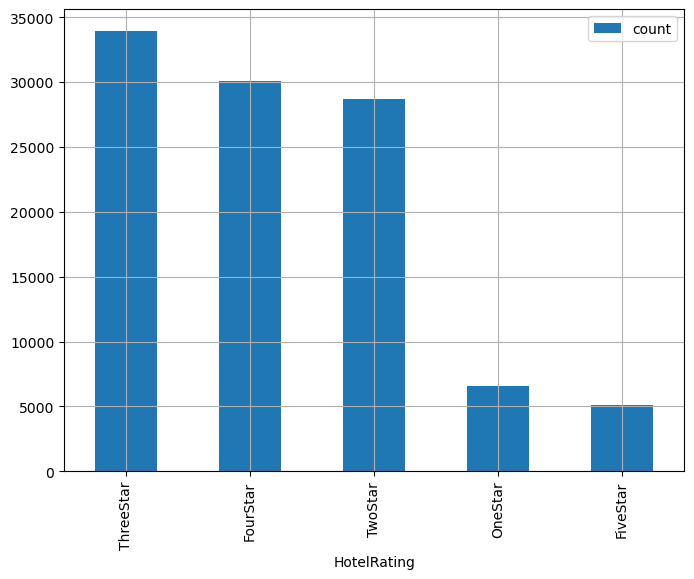

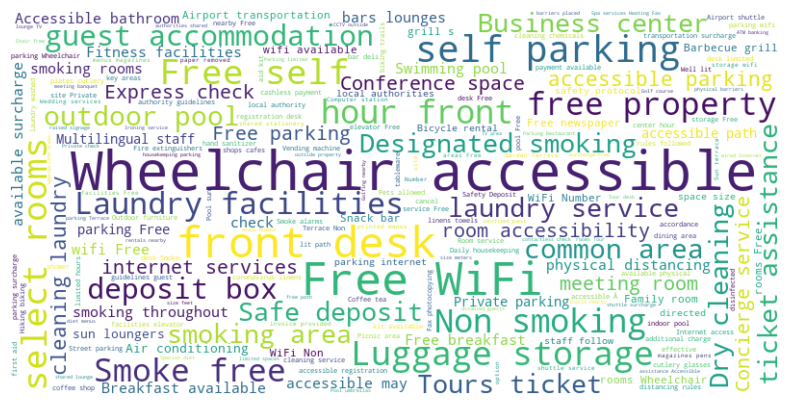

In [7]:
conduct_eda(df)

### Preprocessing and splitting the Data

In [8]:
# Selecting Feature and Target Variables
X_data = df['HotelFacilities']
encoding = {'OneStar': 1,
            'TwoStar': 2,
            'ThreeStar': 3,
            'FourStar': 4,
            'FiveStar': 5
           }
           
y_data = df['HotelRating']
y_data.replace(encoding, inplace=True)
print("\n***********************Dropping Null Values***********************\n")
print("No of rows (Before dropping null): {}".format(df.shape[0]))
X_data.dropna(inplace=True)
print("No of rows (After dropping null): {}".format(df.shape[0]))
print("No of columns: {}".format(df.shape[1]))
print("***********************Removing Duplicates***********************\n")
df.drop_duplicates(inplace=True)
print("No of rows (After removing duplicates): {}".format(df.shape[0]))

/tmp/ipykernel_18954/3121144611.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_data.replace(encoding, inplace=True)



***********************Dropping Null Values***********************

No of rows (Before dropping null): 104365
No of rows (After dropping null): 104365
No of columns: 16
***********************Removing Duplicates***********************

No of rows (After removing duplicates): 104365


In [9]:
apposV2 = {
"are not" : "are not",
"ca" : "can",
"could n't" : "could not",
"did n't" : "did not",
"does n't" : "does not",
"do n't" : "do not",
"had n't" : "had not",
"has n't" : "has not",
"have n't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"is n't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"might n't" : "might not",
"must n't" : "must not",
"sha" : "shall",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"should n't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"were n't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"wo" : "will",
"would n't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"was n't": "was not",
"we'll":"we will",
"did n't": "did not"
}
appos = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not"
}


In [10]:
import en_core_web_sm 

nlp = spacy.load('en_core_web_sm', disable=['parser','ner'])
stop = stopwords.words('english')

def cleanData(df):
    cleaned_facility = []
    for facility in df['HotelFacilities']:
        if isinstance(facility, str):  # Check if the value is a string
            lower_case = facility.lower() # To Lowercase
            lower_case = lower_case.replace(" n't", " not")
            lower_case = lower_case.replace(".", " . ")
            lower_case = ' '.join(word.strip(string.punctuation) for word in lower_case.split()) # Remove punctuation
            words = lower_case.split()
            words = [word for word in words if word.isalpha()] # Remove Numbers
            split = [apposV2[word] if word in apposV2 else word for word in words]
            split = [appos[word] if word in appos else word for word in split]
            split = [word for word in split if word not in stop] # Remove Stopwords
            reformed = " ".join(split)
            doc = nlp(reformed)
            reformed = " ".join([token.lemma_ for token in doc]) # Lemmatization
            cleaned_facility.append(reformed)
    
    df_cleaned = pd.DataFrame()
    df_cleaned['cleaned_facility'] = cleaned_facility
    df_cleaned['HotelRating'] = df['HotelRating']  # Copy the 'HotelRating' column to the cleaned DataFrame
    return df_cleaned



In [11]:
cleaned_data = cleanData(df)
X_data = cleaned_data['cleaned_facility']
y_data = cleaned_data['HotelRating']

In [12]:
print("\n***********************Feature Data after Cleaning***********************\n")
X_data


***********************Feature Data after Cleaning***********************



0         face mask guest available plate cutlery glass ...
1         private parking parking site private entertain...
2         concierge service terrace free self parking la...
3         use cleaning chemical effective coronavirus sw...
4         kid outdoor play equipment private parking par...
                                ...                        
104360    gift shop newsstand dry service free wifi numb...
104361    airport transportation surcharge wheelchair ac...
104362    free breakfast free self parking property tota...
104363    airport transportation surcharge luggage stora...
104364    pool sun loungers concierge service assistance...
Name: cleaned_facility, Length: 104365, dtype: object

In [13]:
print("\n***********************Target Data after Cleaning***********************\n")
y_data


***********************Target Data after Cleaning***********************



0         3
1         3
2         3
3         4
4         4
         ..
104360    4
104361    2
104362    2
104363    3
104364    5
Name: HotelRating, Length: 104365, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42, stratify=y_data)
#X_val, X_test, y_val, y_test = train_test_split(X_test,y_test, test_size=0.5, random_state=42, stratify=y_test)

### Train Model

In [15]:
train_model(X_train, X_test, y_train, y_test)

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
